# Phishing URLs Detector

It is important to click on the right websites for the safety and secuirty of the devices we are using. These devices hold so much information about us, what we do, etc; that it is essential to be mindful of phishing URLs. Thus, the goal of this project is to be able to detect whether a URL can be phishing or legitimate.

This project will attempt to solve the issue of phishing URLs and build a model that can detect the origin of the URL for cybersafety and prevent malicious activity from accessing our devices and information.the main questions to be answered are: 
- What conditions can have a high impact into predicting if a link is a phishing link?
- What parts of the URL does not help to discover a phishing link? 
- How accurate can a model be to discover a phising link? 
- Does the model generate a lot of false positives? 
- Is only the URL format enough to detect a phishing link? Would we need more information about the URL? such as domain, subdomains, etc. 

### Dataset
I am working with a dataset from Kaggle that contains over 2 million rows (2GB) of examples of malicious and legitimate urls. 
dataset: https://www.kaggle.com/datasets/sergioagudelo/phishing-url-detection
#### Key Features
There are more features involved to this dataset. However, these following will be the features that I will be using to train and test the model and answer the previous questions
- Label - labels a link as legitimate or phishing - str (two unique values)
- url_length - float
- starts_with_ip - boolean
- url_entropy - url uncertainty - float
- has_punycode - boolean
- digit_letter_ratio - float 
- dot_count - int 
- at_count - int 
- dash_count - int 
- tld_count - int
- domain_has_digits - boolean
- subdomain_count - int 
- nan_char_entropy - number character uncertainty - float 
- has_internal_links - boolean


### Personal Goal
I will be using different components that form a url (such as the dot count, the length of the URL, the domain/subdomains, etc; to, then, train a pre-built model and test the accuracy, recall, etc. My personal goal to get the model to be as accurate as possible. I will be testing with multiple algorithms and test which one adapts to the data and is better at predicting correctly with this type of data. 

## Pre-Processing 
In this step, I will be cleaning the dataset a bit more to make sure that it is ready for visualizations and model usage. The dataset is sort of clean already and the components of the URLs are already broken down into relevant information that would help to find a pattern

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv('dataset/out.csv')

In [36]:
df = pd.DataFrame(data)

In [37]:
df.head()

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.0,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.0,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.0,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.0,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.0,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0


In [38]:
df.dtypes

url                    object
source                 object
label                  object
url_length              int64
starts_with_ip           bool
url_entropy           float64
has_punycode             bool
digit_letter_ratio    float64
dot_count               int64
at_count                int64
dash_count              int64
tld_count               int64
domain_has_digits        bool
subdomain_count         int64
nan_char_entropy      float64
has_internal_links       bool
whois_data             object
domain_age_days       float64
dtype: object

After taking a look at the dataset and the values I am working with, I want to start working on fixing missing values and dropping, what I think can be, irrelevant columns for the goal of the project.

In [39]:
df.isna().sum()

url                        1
source                     0
label                      0
url_length                 0
starts_with_ip             0
url_entropy                0
has_punycode               0
digit_letter_ratio         1
dot_count                  0
at_count                   0
dash_count                 0
tld_count                  0
domain_has_digits          0
subdomain_count            0
nan_char_entropy           0
has_internal_links         0
whois_data            545300
domain_age_days       750689
dtype: int64

In [40]:
df = df.dropna(subset='url')
df.isna().sum()

url                        0
source                     0
label                      0
url_length                 0
starts_with_ip             0
url_entropy                0
has_punycode               0
digit_letter_ratio         0
dot_count                  0
at_count                   0
dash_count                 0
tld_count                  0
domain_has_digits          0
subdomain_count            0
nan_char_entropy           0
has_internal_links         0
whois_data            545299
domain_age_days       750688
dtype: int64

In [41]:
df = df.drop(columns=['source', 'whois_data', 'domain_age_days'])
df.reset_index(drop=True, inplace=True)

There were a lot of missing values for the previous two columns. Therefore, I thought they might not help us determine whether or not a url is legitimate in this case. I also decided to get rid of the urls themselves since they will not help determining the url label (the important information about the url is already broken down) 

In [42]:
urls = df.pop('url')

In [43]:
df.head()

,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links
0,legitimate,45,False,3.924535,False,0.0,4,0,0,0,False,3,0.310387,False
1,legitimate,17,False,3.572469,False,0.0,1,0,0,0,False,0,0.240439,False
2,legitimate,16,False,3.327820,False,0.0,1,0,0,0,False,0,0.250000,False
3,legitimate,16,False,3.500000,False,0.0,1,0,0,0,False,0,0.250000,False
4,legitimate,27,False,3.930270,False,0.0,3,0,0,0,False,2,0.352214,False


In [44]:
df.isna().sum()

label                 0
url_length            0
starts_with_ip        0
url_entropy           0
has_punycode          0
digit_letter_ratio    0
dot_count             0
at_count              0
dash_count            0
tld_count             0
domain_has_digits     0
subdomain_count       0
nan_char_entropy      0
has_internal_links    0
dtype: int64

I will also use get dummies to categorize is a url is malicious or not using 1s for 'it is a phishing url' and 0s for 'it is legitimate' 

In [45]:
df = pd.get_dummies(df, columns=['label'], dtype=int)
df

,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,label_legitimate,label_phishing
0,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,1,0
1,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,1,0
2,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,1,0
3,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,1,0
4,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499994,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,0,1
2499995,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,0,1
2499996,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,0,1
2499997,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,0,1


In [46]:
df = df.drop(columns=['label_legitimate'])
df

,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,label_phishing
0,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,0
1,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,0
2,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,0
3,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,0
4,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499994,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,1
2499995,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,1
2499996,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,1
2499997,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,1


## Visualizations
Now that there is no longer null values and columns that can affect the model negatively, I will be starting to display some plots to be able to visualize any trends and understand the relationship of the data. Since this is somehwat a mdeium-large data frame, I decided to split it up into samples to make it easier to work with. 

In [77]:
sample_df = df.sample(frac=0.1, random_state=1)
sample_df.shape

(250000, 14)

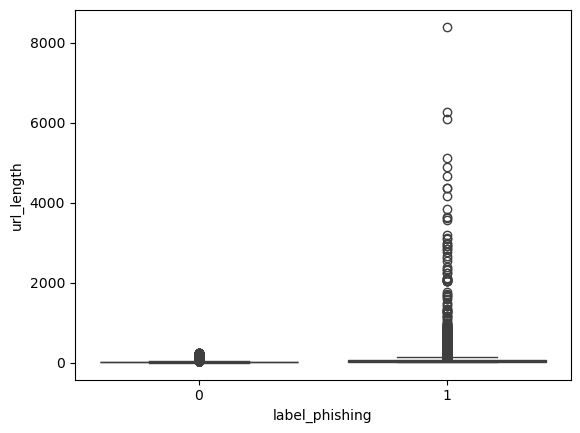

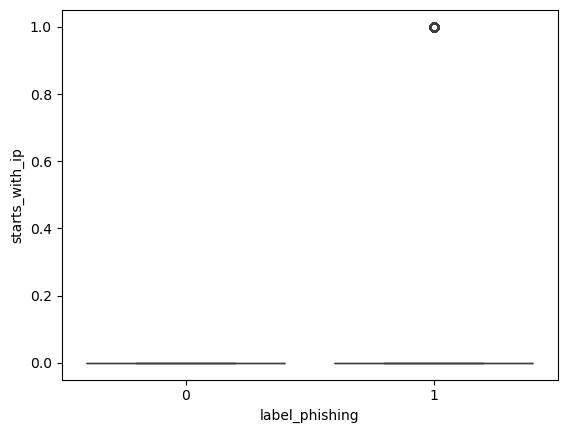

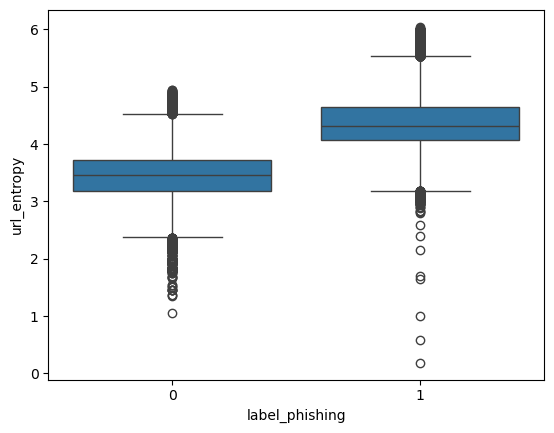

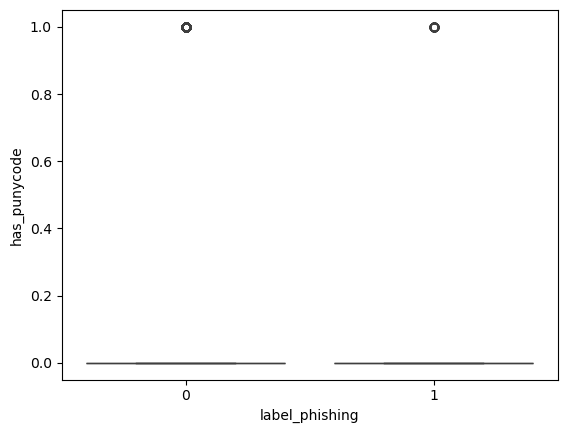

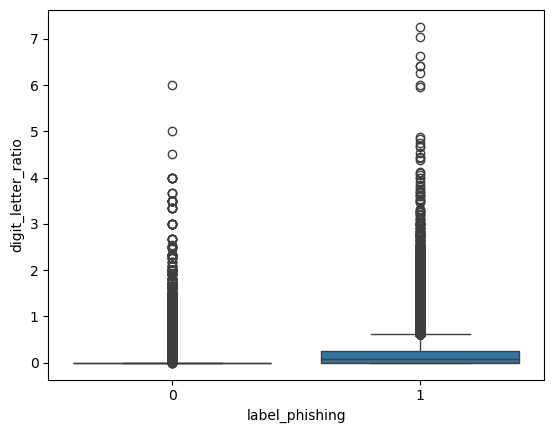

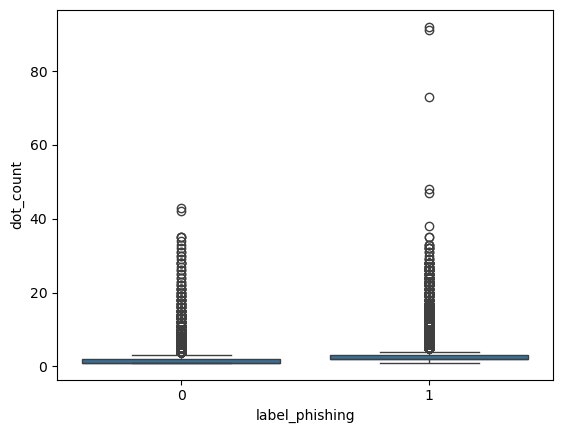

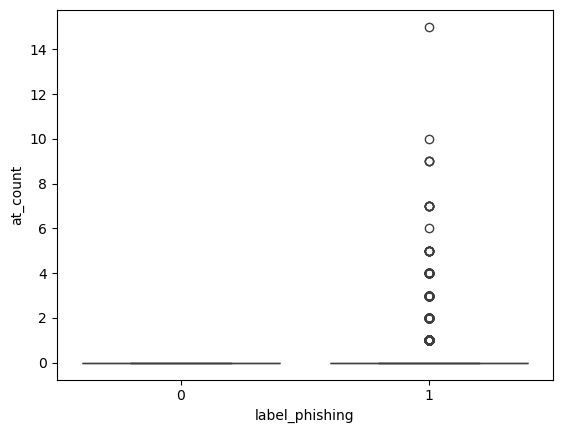

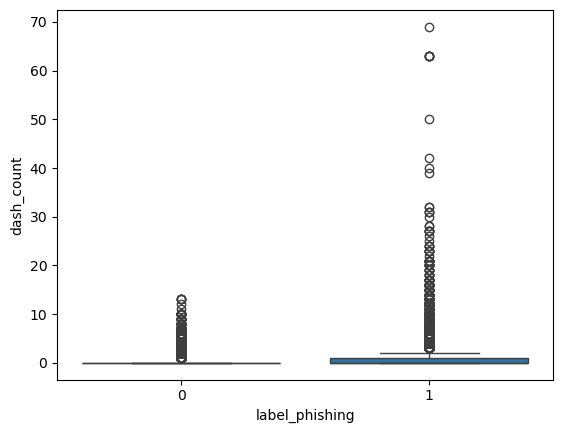

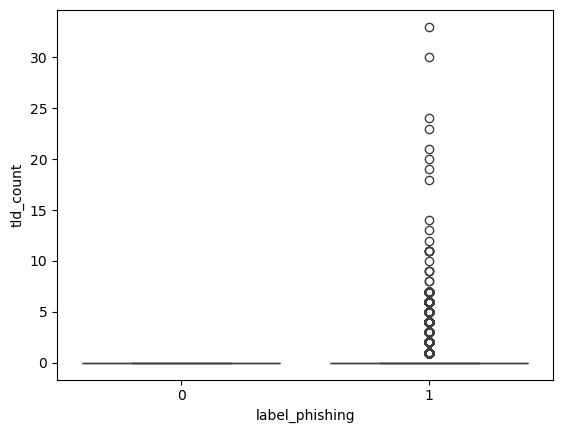

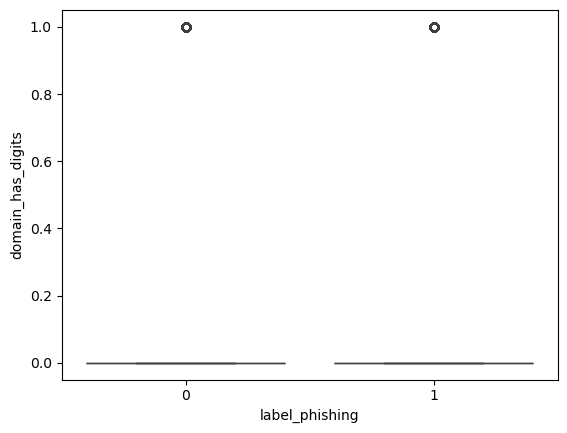

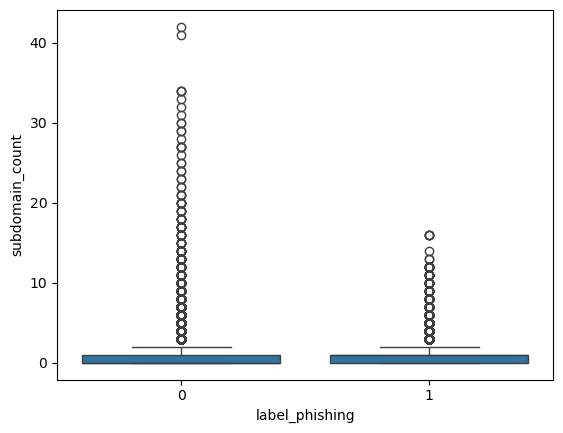

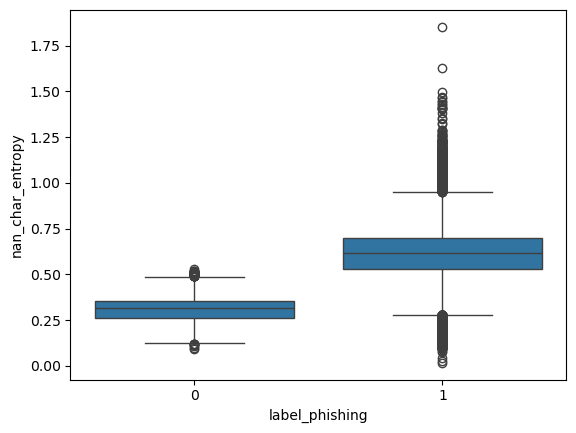

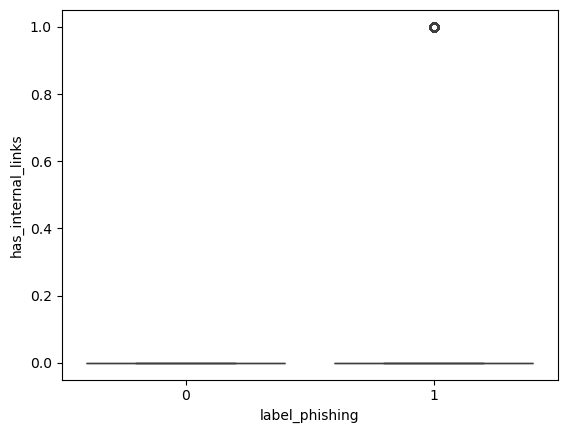

In [78]:
for col in sample_df.columns: 
    if col != 'label_phishing': 
        sns.boxplot(data=sample_df, 
                     x='label_phishing', 
                     y=col)
        plt.show()

Afer these visuals, we are able to understand the data a bit better. I can see how some of the columns do not hold any significance 

## Modeling
I am currently still deciding what type of algorithm I want to use for this project but some that I have been thinking of are KNN, Random Forest, Logistic regression, or SVM. The reason why of using these is because they seem to work good with large datasets and some of them will give the data the ability to prevent overfitting (like random forest). All of them have their pros and cons but my top 2 are Random forest - works great with large datasets and prevents overfitting, Logistic regression - it is fast and simplicit

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [18]:
models = {
    'logistic regression' : LogisticRegression(),
    'SVM' : LinearSCM(),
    'random forest' : RandomForestClassifier()
    }

NameError: name 'LogisticRegression' is not defined